<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scatter plot</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li><li><span><a href="#Fit-and-predict" data-toc-modified-id="Fit-and-predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit and predict</a></span><ul class="toc-item"><li><span><a href="#Get-X,-y" data-toc-modified-id="Get-X,-y-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get X, y</a></span></li><li><span><a href="#Standardize-features" data-toc-modified-id="Standardize-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Standardize features</a></span></li><li><span><a href="#Add-1's-to-X" data-toc-modified-id="Add-1's-to-X-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add 1's to X</a></span></li><li><span><a href="#Fit-data-including-outliers-using-simple-linear-regression." data-toc-modified-id="Fit-data-including-outliers-using-simple-linear-regression.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fit data including outliers using simple linear regression.</a></span></li><li><span><a href="#Plot-regression-plane" data-toc-modified-id="Plot-regression-plane-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot regression plane</a></span></li><li><span><a href="#Fit-data-ignoring-outliers" data-toc-modified-id="Fit-data-ignoring-outliers-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Fit data ignoring outliers</a></span></li><li><span><a href="#Plot-regression-plane-without-outlier" data-toc-modified-id="Plot-regression-plane-without-outlier-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Plot regression plane without outlier</a></span></li></ul></li></ul></div>

Task : Build a good regression model which explains column C by a function of  A and B.

# EDA

First, let's take a look at data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('q2_data.csv', header=None)

In [3]:
data.columns = ['a', 'b', 'c']
data.head()

,a,b,c
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


'a' and 'b' have quite different ranges, so it's better to standardize them before fitting to a regression model.

In [4]:
data.describe()

,a,b,c
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


## Histogram

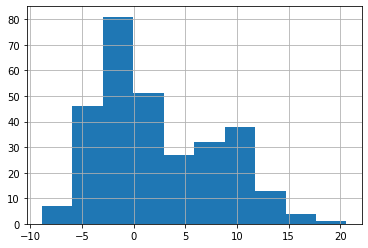

In [5]:
data['a'].hist()

The distribution of 'b' seems like a uniform distribution. It'd be better to check the correlation between b and c

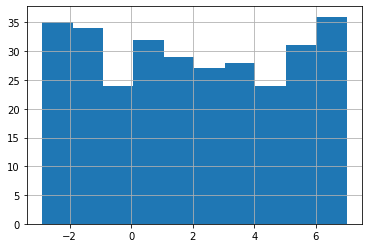

In [6]:
data['b'].hist()

There seem to exist an outlier in the histogram and scatter plot.

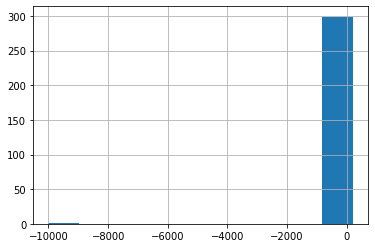

In [7]:
data['c'].hist()

## Scatter plot

In [8]:
def plot_scatter(data, col_x, col_y):
    """
    Display a scatter plot between col_x and col_y.
    """
    plt.figure(figsize=(10, 8))
    plt.plot(data[col_x], data[col_y], '.', color='red')
    plt.xlabel(f'{col_x}')
    plt.ylabel(f'{col_y}')

Due to the outlier, it's hard to detect meaningful relationship between a and c or b and c.

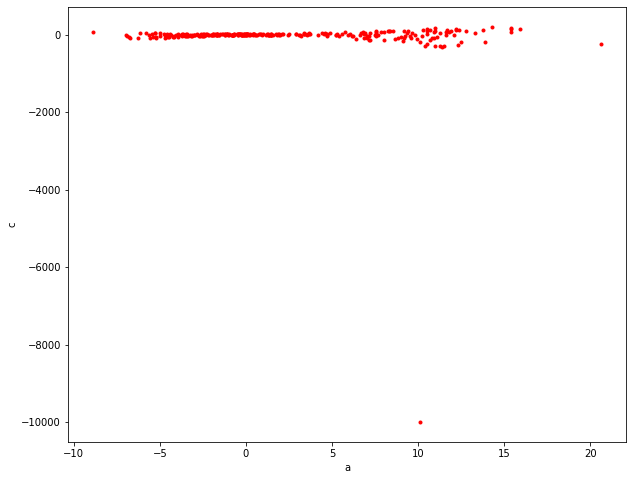

In [9]:
plot_scatter(data, 'a', 'c')

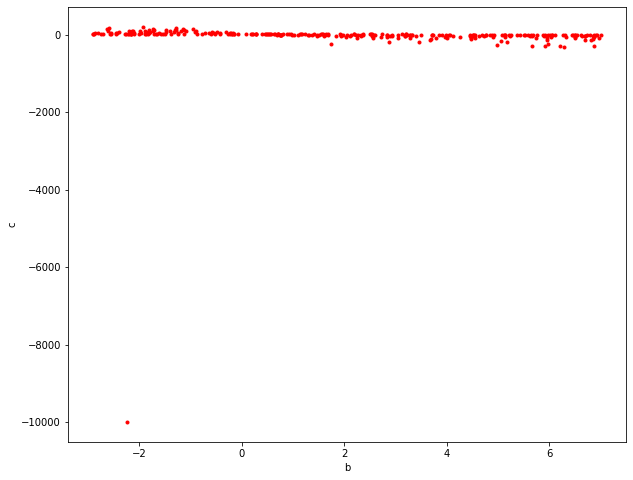

In [10]:
plot_scatter(data, 'b', 'c')

## Correlation

The correlation between a and c or b and c is almost 0.

In [11]:
data.corr()

,a,b,c
a,1.000000,-0.192345,-0.077280
b,-0.192345,1.000000,0.006031
c,-0.077280,0.006031,1.000000


We'll add a column of random variables to compare the correlations.

In [12]:
data['rand'] = np.random.random(300)

The correlation between 'rand' variables and c is 0.07. This is even stronger than the correlation between b and c which is 0.006. The correlation between a and c is not much stronger, -0.077. It seems like b is even less predictable than some random values and a is not much more useful than the random values either.

In [13]:
data.corr()

,a,b,c,rand
a,1.000000,-0.192345,-0.077280,-0.087397
b,-0.192345,1.000000,0.006031,-0.055342
c,-0.077280,0.006031,1.000000,-0.065836
rand,-0.087397,-0.055342,-0.065836,1.000000


# Fit and predict

## Get X, y

Make arrays of features and target for computation.

In [14]:
def get_arrays(data):
    """
    Make arrays of features and target for computation.
    """
    X = np.array(data[['a', 'b']])
    y = np.array(data[['c']])
    return X, y

In [15]:
X, y = get_arrays(data)

## Standardize features

Standardize features to get better prediction. Since 'a' and 'b' have pretty different scales, it's better to standardize them before fitting into regression model.

In [16]:
def standardize(x):
    """
    Standardize x so that x lies between 0 and 1.
    """
    x = (x - np.mean(x))/np.std(x)
    return x

In [17]:
X = standardize(X)

## Add 1's to X

Add a column of 1's to X for computing intercept.

In [18]:
def add_ones(X):
    """
    Add a column of 1's to X so that it adds a column of intercept to b later.
    """
    ones = np.ones((len(X), 1))
    X = np.c_[ones, X]
    return X

In [19]:
X = add_ones(X)

## Fit data including outliers using simple linear regression.

This time, we'll fit data including the outlier, and we'll use a simple linear regression model.

In [20]:
def get_coefficients(X, y):
    """
    Calculates coefficients 'b' minimizing ordinary least squares of the errors.
    This b contains intercepts in the first column.
    """
    b = np.linalg.inv(X.T@X)@X.T@y
    return b

In [21]:
b = get_coefficients(X, y)

In [22]:
def predict(X, b):
    """
    Calculates predicted y's.
    """
    return X@b

In [23]:
y_hat = predict(X, b)

In [24]:
def get_mse(y, y_hat):
    """
    Calculates mean squared errors.
    """
    mse = np.mean((np.array(y - y_hat))**2)
    return np.round(mse, 2)

In [25]:
def get_mae(y, y_hat):
    """
    Calculates median absolute errors.
    """
    mae = np.median(np.abs(np.array(y - y_hat)))
    return np.round(mae, 2)

The mean squared error of this model is extremely high. It's because of the outlier.

In [26]:
MSE1 = get_mse(y, y_hat)
MSE1

334688.27

The median absolute error of this model is 33. This means that the difference between true c's and predicted c's are roughly 33.

In [27]:
MAE1 = get_mae(y, y_hat)
MAE1

33.25

## Plot regression plane

This is the data in 3D plot and you can play around with different angles on jupyter notebook. (It doesn't work on github. For some reason the plot doesn't show, run the code again.)  

Because of the outlier, it's pretty hard to tell if the regression plane fits well to the data.

In [34]:
def plot_3d(X, y, b):
    """
    Displays 3d plot and a regression plane.
    * code credit : https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b 
    """
    %matplotlib notebook
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 1], X[:, 2], y, marker='.', color='red')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('c')

    xs = np.tile(np.arange(-3, 5), (8, 1))
    ys = np.tile(np.arange(-3, 5), (8, 1)).T
    zs = xs*b[1]+ys*b[2]+b[0]

    ax.plot_surface(xs, ys, zs, alpha=0.5)

    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(.001)

<IPython.core.display.Javascript object>


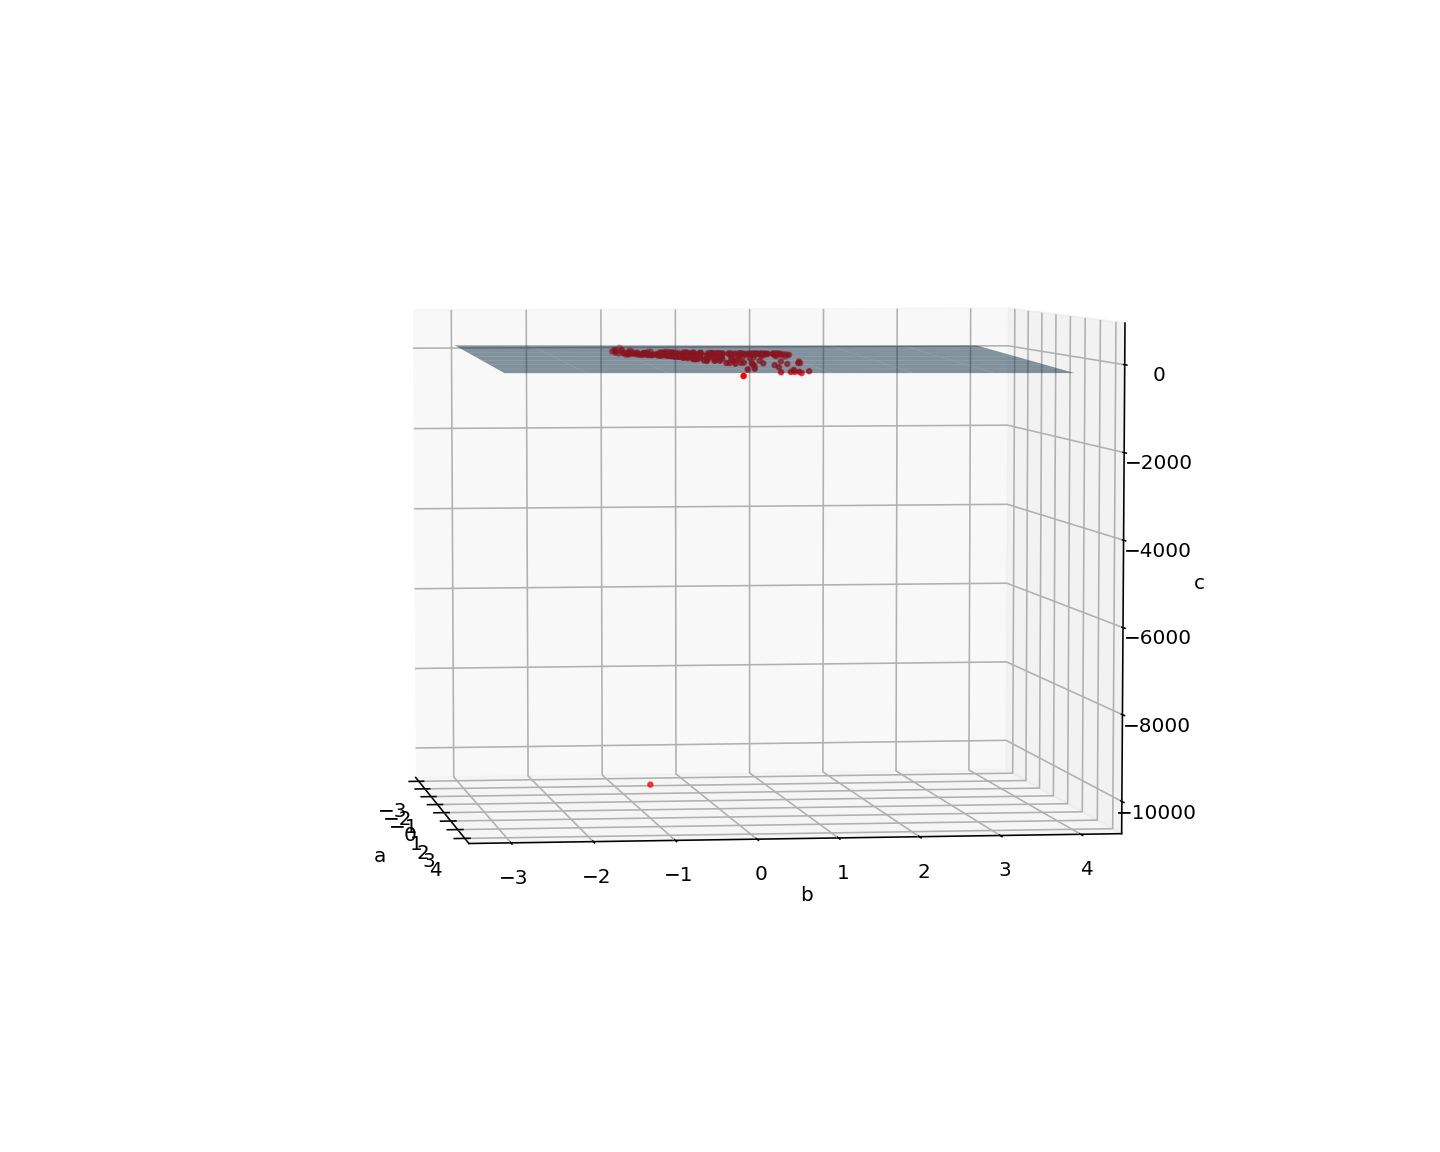

In [35]:
plot_3d(X, y, b)

## Fit data ignoring outliers

The range of c is from -10000 to 202. To get a better model, we'll ignore the outlier this time.

In [36]:
data.c.describe()

count      300.000000
mean       -41.564919
std        581.251021
min     -10000.000000
25%        -23.375000
50%         -3.090000
75%         16.300000
max        202.000000
Name: c, dtype: float64

Ignore the datapoint with c=-10000.

In [37]:
data1 = data.loc[data.c>-10000]

The range of c has decreased to '-315~202' after removing the outlier.

In [38]:
data1.c.describe()

count    299.000000
mean      -8.259116
std       71.321872
min     -315.000000
25%      -23.100000
50%       -2.940000
75%       16.300000
max      202.000000
Name: c, dtype: float64

In [39]:
X, y = get_arrays(data1)

In [40]:
X = standardize(X)

In [41]:
X = add_ones(X)

In [42]:
b = get_coefficients(X, y)

In [43]:
y_hat = predict(X, b)

In [44]:
MSE2 = get_mse(y, y_hat)
MSE2

3072.18

In [45]:
MAE2 = get_mae(y, y_hat)
MAE2

30.55

After ignoring the outlier, MSE has dramatically decreased. MAE hasn't decreased as much as MSE because MAE is more robust to outliers. However, it's clear that ignoring the outlier has improved the model judging by MSE and MAE.

In [46]:
MSE1, MSE2

(334688.27, 3072.18)

In [47]:
MAE1, MAE2

(33.25, 30.55)

## Plot regression plane without outlier

After ignoring the outlier, the regression plane seems to fit relatively better to the data.

<IPython.core.display.Javascript object>


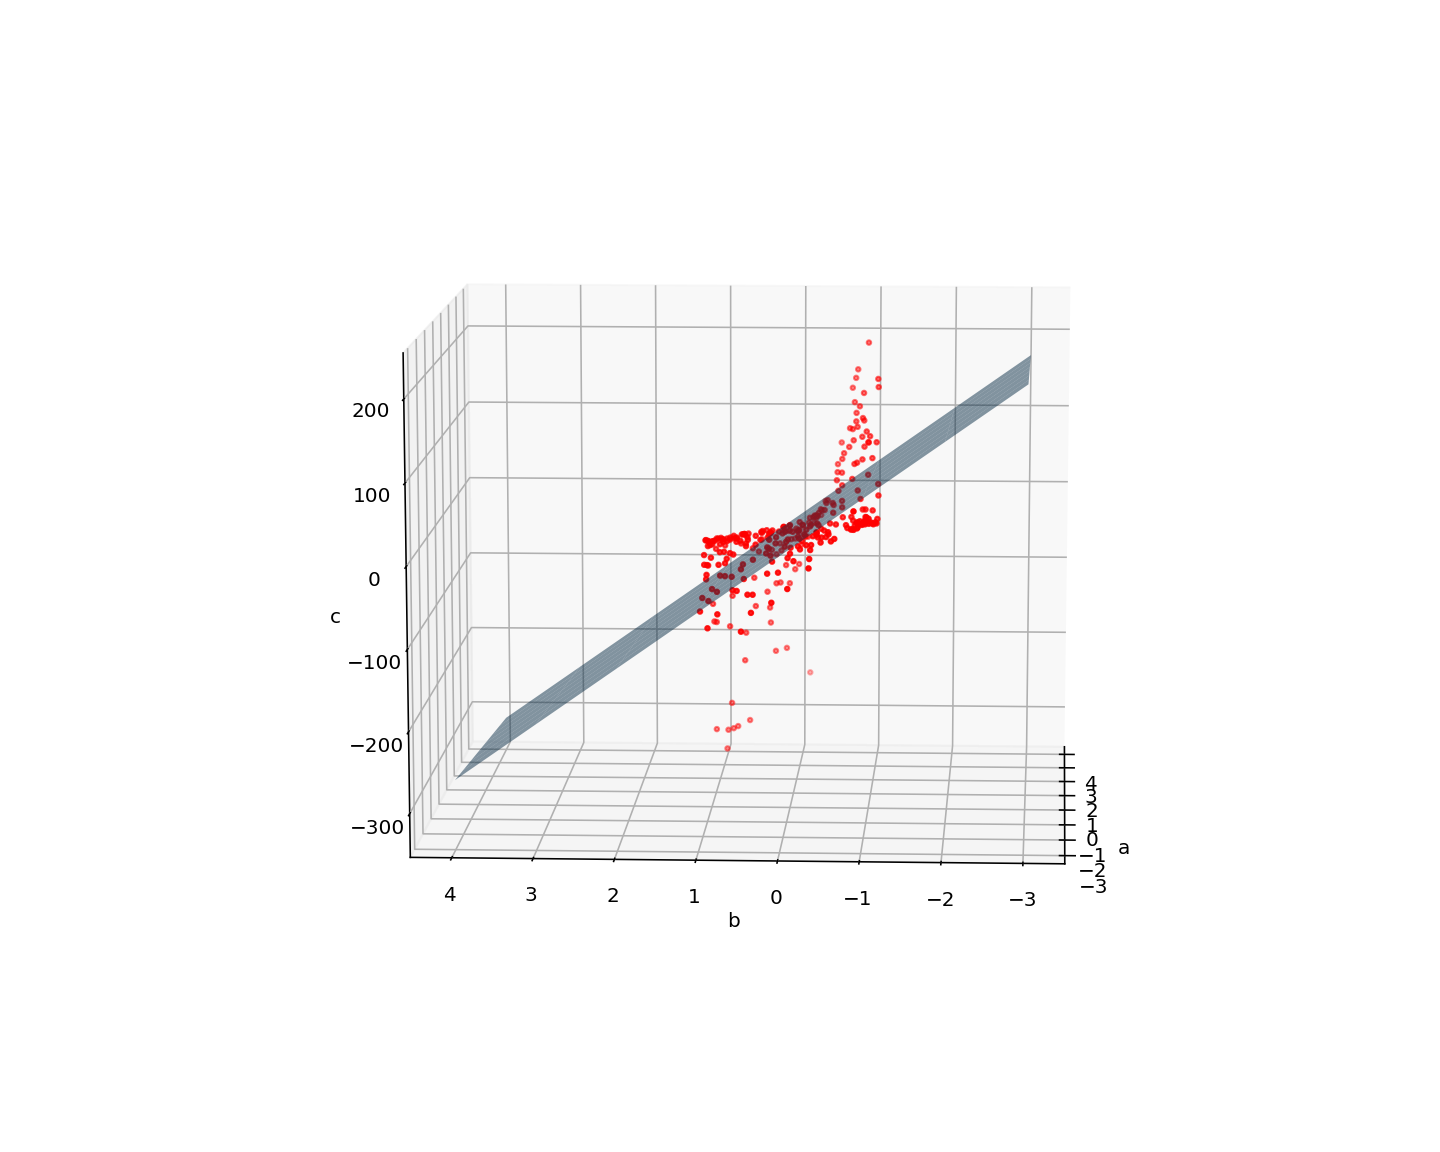

In [48]:
plot_3d(X, y, b)